<a href="https://colab.research.google.com/github/SethurajS/DeepLearning_Snippets/blob/master/Logistic_Regression_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE REQUIREMENTS**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy as sp
from PIL import Image
from scipy import ndimage

print("Numpy : {}".format(np.__version__))

Numpy : 1.18.4


# **IMPORTING THE DATASETS**

In [10]:
from google.colab import files
datasets = files.upload()

Saving train_catvnoncat.h5 to train_catvnoncat.h5
Saving test_catvnoncat.h5 to test_catvnoncat.h5


In [0]:
def load_data():
  
  train_data = h5py.File('train_catvnoncat.h5', "r")
  train_data_x = np.array(train_data["train_set_x"][:])
  train_data_y = np.array(train_data["train_set_y"][:])

  test_data = h5py.File('test_catvnoncat.h5', "r")
  test_data_x = np.array(test_data["test_set_x"][:])
  test_data_y = np.array(test_data["test_set_y"][:])

  classes = np.array(train_data["list_classes"][:])

  train_data_y = train_data_y.reshape((1, train_data_y.shape[0]))
  test_data_y = test_data_y.reshape((1, test_data_y.shape[0]))

  # print(train_data_x.shape)
  # print(test_data_x.shape)
  # print(train_data_y.shape)
  # print(test_data_y.shape)

  return train_data_x, train_data_y, test_data_x, test_data_y, classes


In [0]:
train_data_x, train_data_y, test_data_x, test_data_y, classes = load_data()

In [39]:
print("Train data size : {}".format(train_data_x.shape[0]))
print("Test data size : {}".format(test_data_x.shape[0]))
print("Train Features Shape : {}".format(train_data_x.shape))
print("Test Features Shape : {}".format(test_data_x.shape))
print("Train Labels Shape : {}".format(train_data_y.shape))
print("Test Labels Shape : {}".format(test_data_y.shape))

Train data size : 209
Test data size : 50
Train Features Shape : (209, 64, 64, 3)
Test Features Shape : (50, 64, 64, 3)
Train Labels Shape : (1, 209)
Test Labels Shape : (1, 50)


Text(0.5, 1.0, 'Class : non-cat')

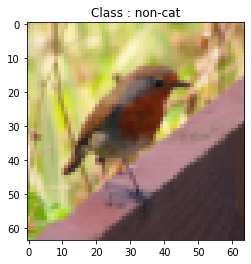

In [40]:
index = 10
plt.imshow(train_data_x[index])
plt.title("Class : "+classes[np.squeeze(train_data_y[:, index])].decode("utf-8"))

# **PREPROCESSING THE DATASETS**

FLATTENING THE **FEATURES**

In [91]:
train_data_x = train_data_x.reshape(train_data_x.shape[0], -1).T
test_data_x = test_data_x.reshape(test_data_x.shape[0], -1).T

print(train_data_x.shape)
print(test_data_x.shape)

(12288, 209)
(12288, 50)


**NORMALIZING THE DATASET**

In [0]:
train_data_x = train_data_x/255.0
test_data_x = test_data_x/255.0

# **BUILDING THE LOGISTIC REGRESSION MODEL**

**SIGMOID FUNCTION**

In [0]:
def sigmoid(Z):
  
  """ Sigmoid function """

  A = 1/(1+np.exp(-Z))

  return A


In [62]:
""" Checking the function 'sigmoid' """

print ("sigmoid(2, 10) = {}".format(str(sigmoid(np.array([2,10])))))

sigmoid(2, 10) = [0.88079708 0.9999546 ]


**PARAMETER INITIALIZATION**

In [0]:
def parameter_initialization(dim):

  """ Initialize weights and bias to zero """

  weights = np.zeros((dim, 1))
  bias = 0

  return weights, bias


In [60]:
""" Checking the function 'parameter_initialization' """

weights, bias = parameter_initialization(2)
print("Weights : {}\n Bias : {}".format(weights, bias))

Weights : [[0.]
 [0.]]
 Bias : 0


**FROWARD AND BACKWARD PROPAGATION**

In [0]:
def propagate(w, b, X, Y):

  m = X.shape[1]

  """ Computing SIGMOID of the linear function """

  A = sigmoid(np.dot(w.T, X) + b)

  """ Computing the COST """

  cost = -1 * np.mean(np.multiply(Y, np.log(A)) + np.multiply(1-Y, np.log(1-A)), axis=1)

  """ Updation in LOSS when changing the WEIGHTS """

  dw = np.dot(X, np.transpose(A-Y))*(1/m)

  """ Updation in LOSS when changing the BIAS """

  db = np.mean((A-Y))


  effects = {
      "dw" : dw,
      "db" : db
  }

  return effects, cost

In [58]:
""" Checking the function 'propagate' """

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
effects, cost = propagate(w, b, X, Y)
print ("dw = " + str(effects["dw"]))
print ("db = " + str(effects["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = [5.80154532]


**OPTIMIZATION**

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

  costs = []

  for i in range(num_iterations):

    effects, cost = propagate(w, b, X, Y)

    dw = effects["dw"]
    db = effects["db"]

    """ Updating the weights and biases """

    w = w - learning_rate * dw
    b = b - learning_rate * db

    if i % 100 == 0:

      costs.append(cost)

    if print_cost and i % 100 == 0:

      print("Epoch: {} ----> Cost: {}".format(i, cost))

  parms = {
      "w" : w,
      "b" : b
  }

  return parms, effects, costs



In [77]:
""" Checking the function 'optimize' """

params, effects, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(effects["dw"]))
print ("db = " + str(effects["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


# **PREDICT**

In [0]:
def predict(w, b, X):

  m = X.shape[1]
  prediction = np.zeros((1, m))
  w = w.reshape(X.shape[0], 1)

  A = sigmoid(np.dot(w.T, X) + b)

  for i in range(A.shape[1]):

    if A[0, i] >= 0.5:
      prediction[0, i] = 1
    else:
      prediction[0, i] = 0

  return prediction


In [83]:
""" Checking the function 'predict' """

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


# **LOGISTIC REGRESSION MODEL** [ Merging all the methods into the model ]

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

  w, b = parameter_initialization(X_train.shape[0])

  parameters, effects, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

  w = parameters["w"]
  b = parameters["b"]

  prediction_test = predict(w, b, X_test)
  prediction_train = predict(w, b, X_train)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - Y_test)) * 100))

  returns = {
      "costs" : costs,
      "prediction_test" : prediction_test,
      "prediction_train" : prediction_train,
      "w" : w,
      "b" : b,
      "learning_rate" : learning_rate,
      "num_iterations" : num_iterations
  }

  return returns

# **PREDICTION**

In [95]:
logistic_regression = model(train_data_x, train_data_y, test_data_x, test_data_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

# print(logistic_regression)

Epoch: 0 ----> Cost: [0.69314718]
Epoch: 100 ----> Cost: [0.58450836]
Epoch: 200 ----> Cost: [0.46694904]
Epoch: 300 ----> Cost: [0.37600687]
Epoch: 400 ----> Cost: [0.33146329]
Epoch: 500 ----> Cost: [0.30327307]
Epoch: 600 ----> Cost: [0.27987959]
Epoch: 700 ----> Cost: [0.26004214]
Epoch: 800 ----> Cost: [0.24294068]
Epoch: 900 ----> Cost: [0.22800422]
Epoch: 1000 ----> Cost: [0.21481951]
Epoch: 1100 ----> Cost: [0.20307819]
Epoch: 1200 ----> Cost: [0.19254428]
Epoch: 1300 ----> Cost: [0.18303334]
Epoch: 1400 ----> Cost: [0.17439859]
Epoch: 1500 ----> Cost: [0.1665214]
Epoch: 1600 ----> Cost: [0.15930452]
Epoch: 1700 ----> Cost: [0.15266732]
Epoch: 1800 ----> Cost: [0.14654224]
Epoch: 1900 ----> Cost: [0.14087208]
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
